In [2]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns 
from catboost import CatBoostClassifier


In [3]:
traindata = pd.read_csv("./train_users_2.csv")

In [4]:
traindata.head(20)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
5,osr2jwljor,2010-01-01,20100101215619,2010-01-02,-unknown-,NaN,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US
6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
7,0d01nltbrs,2010-01-03,20100103191905,2010-01-13,FEMALE,47.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US
8,a1vcnhxeij,2010-01-04,20100104004211,2010-07-29,FEMALE,50.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
9,6uh8zyj2gn,2010-01-04,20100104023758,2010-01-04,-unknown-,46.0,basic,0,en,other,craigslist,omg,Web,Mac Desktop,Firefox,US


In [7]:
traindata.dtypes

id                          object
date_account_created        object
timestamp_first_active       int64
date_first_booking          object
gender                      object
age                        float64
signup_method               object
signup_flow                  int64
language                    object
affiliate_channel           object
affiliate_provider          object
first_affiliate_tracked     object
signup_app                  object
first_device_type           object
first_browser               object
country_destination         object
dtype: object

In [6]:
traindata.describe(include="all")

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
count,213451,213451,2.134510e+05,88908,213451,125461.000000,213451,213451.000000,213451,213451,213451,207386,213451,213451,213451,213451
unique,213451,1634,NaN,1976,4,NaN,3,NaN,25,8,18,7,4,9,52,12
top,jreptle7ro,2014-05-13,NaN,2014-05-22,-unknown-,NaN,basic,NaN,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
freq,1,674,NaN,248,95688,NaN,152897,NaN,206314,137727,137426,109232,182717,89600,63845,124543
mean,NaN,NaN,2.013085e+13,NaN,NaN,49.668335,NaN,3.267387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,9.253717e+09,NaN,NaN,155.666612,NaN,7.637707,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,2.009032e+13,NaN,NaN,1.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,2.012123e+13,NaN,NaN,28.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,2.013091e+13,NaN,NaN,34.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,2.014031e+13,NaN,NaN,43.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


([<matplotlib.patches.Wedge at 0x20df04bcfc8>,
 [Text(-0.6374260040708731, 0.8964865249038824, 'NDF'),
  Text(0.3518560891101517, -1.0422078931557317, 'US'),
  Text(0.9801761174997744, -0.4992542224989875, 'other'),
  Text(1.0505551904277426, -0.3260886257834355, 'FR'),
  Text(1.0757003965157959, -0.2299318528080874, 'IT'),
  Text(1.0873919856100125, -0.16606826798372498, 'GB'),
  Text(1.0941487402849694, -0.11330725542883291, 'ES'),
  Text(1.0977763933177862, -0.06990701162396556, 'CA'),
  Text(1.0991996073579258, -0.04195501381458721, 'DE'),
  Text(1.0997487617093173, -0.0235087455816582, 'NL'),
  Text(1.0999531897874317, -0.010147919809208587, 'AU'),
  Text(1.0999971778597688, -0.0024917264184409994, 'PT')])

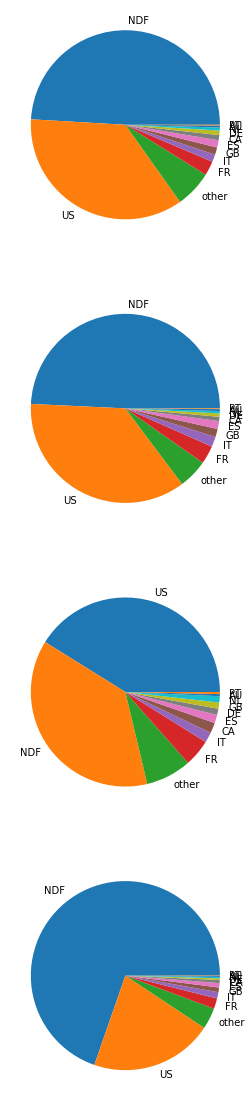

In [9]:

male = traindata[traindata.gender=="MALE"].country_destination.value_counts()
female = traindata[traindata.gender=="FEMALE"].country_destination.value_counts()
other = traindata[traindata.gender=="OTHER"].country_destination.value_counts()
unknown = traindata[traindata.gender=="-unknown-"].country_destination.value_counts()


fig,ax = plt.subplots(4)
# fig.
fig.set_figwidth(20)
fig.set_figheight(20)

ax[0].pie(male.values,labels=male.index,radius=1)
ax[1].pie(female.values,labels=female.index,radius=1)
ax[2].pie(other.values,labels=other.index,radius=1)
ax[3].pie(unknown.values,labels=unknown.index,radius=1)





In [53]:
traindata.eq("-unknown-").sum()/len(traindata)

id                         0.000000
date_account_created       0.000000
timestamp_first_active     0.000000
date_first_booking         0.000000
gender                     0.448290
age                        0.000000
signup_method              0.000000
signup_flow                0.000000
language                   0.000000
affiliate_channel          0.000000
affiliate_provider         0.000000
first_affiliate_tracked    0.000000
signup_app                 0.000000
first_device_type          0.000000
first_browser              0.127739
country_destination        0.000000
dtype: float64

In [15]:
traindata.isnull().sum()/len(traindata)

id                         0.000000
date_account_created       0.000000
timestamp_first_active     0.000000
date_first_booking         0.583473
gender                     0.000000
age                        0.412226
signup_method              0.000000
signup_flow                0.000000
language                   0.000000
affiliate_channel          0.000000
affiliate_provider         0.000000
first_affiliate_tracked    0.028414
signup_app                 0.000000
first_device_type          0.000000
first_browser              0.000000
country_destination        0.000000
dtype: float64

In [14]:
traindata.first_affiliate_tracked.value_counts()

untracked        109232
linked            46287
omg               43982
tracked-other      6156
product            1556
marketing           139
local ops            34
Name: first_affiliate_tracked, dtype: int64

In [13]:
traindata.first_device_type.value_counts()

Mac Desktop           89600
Windows Desktop       72716
iPhone                20759
iPad                  14339
Other/Unknown         10667
Android Phone          2803
Android Tablet         1292
Desktop (Other)        1199
SmartPhone (Other)       76
Name: first_device_type, dtype: int64

In [12]:
traindata.signup_app.value_counts()

Web        182717
iOS         19019
Moweb        6261
Android      5454
Name: signup_app, dtype: int64

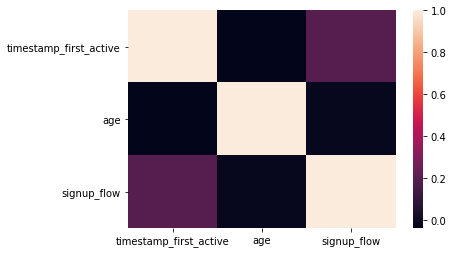

In [57]:
sns.heatmap(traindata.corr())

In [58]:
sessions = pd.read_csv("./sessions.csv")

In [67]:
sessions[sessions.user_id=="d1mm9tcy42"].action_detail.value_counts()

wishlist_content_update        25
view_search_results            23
p3                             14
similar_listings                9
change_trip_characteristics     8
-unknown-                       8
header_userpic                  1
contact_host                    1
message_post                    1
Name: action_detail, dtype: int64

In [59]:
sessions.describe(include="all")

,user_id,action,action_type,action_detail,device_type,secs_elapsed
count,10533241,10488111,9441533,9441533,10567737,1.043171e+07
unique,135483,359,10,155,14,NaN
top,mxqbh3ykxl,show,view,view_search_results,Mac Desktop,NaN
freq,2722,2768278,3560902,1776885,3594286,NaN
mean,NaN,NaN,NaN,NaN,NaN,1.940581e+04
std,NaN,NaN,NaN,NaN,NaN,8.888424e+04
min,NaN,NaN,NaN,NaN,NaN,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,2.290000e+02
50%,NaN,NaN,NaN,NaN,NaN,1.147000e+03
75%,NaN,NaN,NaN,NaN,NaN,8.444000e+03


In [62]:
sessions.isnull().sum()/len(sessions)

user_id          0.003264
action           0.007535
action_type      0.106570
action_detail    0.106570
device_type      0.000000
secs_elapsed     0.012872
dtype: float64

In [61]:
sessions.device_type.value_counts()

Mac Desktop                         3594286
Windows Desktop                     2658539
iPhone                              2105031
Android Phone                        839637
iPad Tablet                          683414
Android App Unknown Phone/Tablet     273652
-unknown-                            211279
Tablet                               139886
Linux Desktop                         28373
Chromebook                            22348
iPodtouch                              8198
Windows Phone                          2047
Blackberry                              979
Opera Phone                              68
Name: device_type, dtype: int64

In [60]:
agegenderbkts = pd.read_csv("./age_gender_bkts.csv")

In [42]:
len(traindata)

213451

In [43]:
agegenderbkts.describe(include="all")

,age_bucket,country_destination,gender,population_in_thousands,year
count,420,420,420,420.000000,420.0
unique,21,10,2,NaN,NaN
top,50-54,AU,female,NaN,NaN
freq,20,42,210,NaN,NaN
mean,NaN,NaN,NaN,1743.133333,2015.0
std,NaN,NaN,NaN,2509.843202,0.0
min,NaN,NaN,NaN,0.000000,2015.0
25%,NaN,NaN,NaN,396.500000,2015.0
50%,NaN,NaN,NaN,1090.500000,2015.0
75%,NaN,NaN,NaN,1968.000000,2015.0


In [44]:
# traindata = pd.merge(traindata,sessions ,left_on=["id"],right_on=["user_id"],how="left")

In [45]:
# traindata.describe(include="all")

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,...,signup_app,first_device_type,first_browser,country_destination,user_id,action,action_type,action_detail,device_type,secs_elapsed
count,5677593,5677593,5.677593e+06,2540381,5677593,3.506414e+06,5677593,5.677593e+06,5677593,5677593,...,5677593,5677593,5677593,5677593,5537957,5486425,4918097,4918097,5537957,5.464142e+06
unique,213451,1634,NaN,1976,4,NaN,3,NaN,25,8,...,4,9,52,12,73815,331,9,128,14,NaN
top,0hjoc5q8nf,2014-06-09,NaN,2014-06-11,-unknown-,NaN,basic,NaN,en,direct,...,Web,Mac Desktop,Chrome,NDF,0hjoc5q8nf,show,view,view_search_results,Mac Desktop,NaN
freq,2644,58906,NaN,26970,2661945,NaN,4307764,NaN,5472863,3655510,...,4299115,2228045,1680184,3137212,2644,1301904,1669723,912787,2150595,NaN
mean,NaN,NaN,2.014005e+13,NaN,NaN,4.331821e+01,NaN,5.322589e+00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.045577e+04
std,NaN,NaN,2.560384e+09,NaN,NaN,1.224373e+02,NaN,9.711186e+00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.260970e+04
min,NaN,NaN,2.009032e+13,NaN,NaN,1.000000e+00,NaN,0.000000e+00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00
25%,NaN,NaN,2.014023e+13,NaN,NaN,2.700000e+01,NaN,0.000000e+00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.360000e+02
50%,NaN,NaN,2.014042e+13,NaN,NaN,3.200000e+01,NaN,0.000000e+00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.137000e+03
75%,NaN,NaN,2.014053e+13,NaN,NaN,4.100000e+01,NaN,0.000000e+00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.493000e+03


In [46]:
# traindata[traindata.id=="0hjoc5q8nf"]

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,...,signup_app,first_device_type,first_browser,country_destination,user_id,action,action_type,action_detail,device_type,secs_elapsed
4779317,0hjoc5q8nf,2014-06-10,20140610080848,2014-06-11,MALE,29.0,facebook,23,en,direct,...,Android,Android Phone,-unknown-,US,0hjoc5q8nf,show,view,p3,Tablet,1000.0
4779318,0hjoc5q8nf,2014-06-10,20140610080848,2014-06-11,MALE,29.0,facebook,23,en,direct,...,Android,Android Phone,-unknown-,US,0hjoc5q8nf,collections,view,user_wishlists,Tablet,1428.0
4779319,0hjoc5q8nf,2014-06-10,20140610080848,2014-06-11,MALE,29.0,facebook,23,en,direct,...,Android,Android Phone,-unknown-,US,0hjoc5q8nf,show,view,user_profile,Tablet,160.0
4779320,0hjoc5q8nf,2014-06-10,20140610080848,2014-06-11,MALE,29.0,facebook,23,en,direct,...,Android,Android Phone,-unknown-,US,0hjoc5q8nf,index,-unknown-,-unknown-,Tablet,480.0
4779321,0hjoc5q8nf,2014-06-10,20140610080848,2014-06-11,MALE,29.0,facebook,23,en,direct,...,Android,Android Phone,-unknown-,US,0hjoc5q8nf,show,view,p3,Tablet,0.0
4779322,0hjoc5q8nf,2014-06-10,20140610080848,2014-06-11,MALE,29.0,facebook,23,en,direct,...,Android,Android Phone,-unknown-,US,0hjoc5q8nf,show,view,p3,Tablet,15.0
4779323,0hjoc5q8nf,2014-06-10,20140610080848,2014-06-11,MALE,29.0,facebook,23,en,direct,...,Android,Android Phone,-unknown-,US,0hjoc5q8nf,show,view,user_profile,Tablet,315.0
4779324,0hjoc5q8nf,2014-06-10,20140610080848,2014-06-11,MALE,29.0,facebook,23,en,direct,...,Android,Android Phone,-unknown-,US,0hjoc5q8nf,index,-unknown-,-unknown-,Tablet,18.0
4779325,0hjoc5q8nf,2014-06-10,20140610080848,2014-06-11,MALE,29.0,facebook,23,en,direct,...,Android,Android Phone,-unknown-,US,0hjoc5q8nf,social_connections,data,user_social_connections,Tablet,787.0
4779326,0hjoc5q8nf,2014-06-10,20140610080848,2014-06-11,MALE,29.0,facebook,23,en,direct,...,Android,Android Phone,-unknown-,US,0hjoc5q8nf,collections,view,user_wishlists,Tablet,1614.0
